In [1]:
file_name = '../run_nx_graph.log'

In [72]:
import time
time_format = '%d %b %Y %H:%M:%S'

get2nd = lambda x: x.split()[1]

time_info = []
data_info = []
itime = -1
with open(file_name) as f:
    for line in f:
        if line[0] != '#':
            tt = time.strptime(line[:-1], time_format)
            time_info.append(tt)
            data_info.append([])
            itime += 1
        else:
            items = line.split(',')
            try:
                iteration = int(get2nd(items[0]))
            except ValueError:
                continue
            time_consumption = float(get2nd(items[1]))
            loss_train = float(get2nd(items[2]))
            loss_test  = float(get2nd(items[3]))
            precision  = float(get2nd(items[4]))
            recall     = float(get2nd(items[5]))
            data_info[itime].append([iteration, time_consumption, loss_train,
                                  loss_test, precision, recall
                                 ])

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_info(info, name):
    if type(info) is not 'numpy.ndarray':
        info = np.array(first_info)
    df = pd.DataFrame(info, columns=['iteration', 'time', 'loss_train', 'loss_test', 'precision', 'recall'])
    
    # make plots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)
    axs = axs.flatten()
    
    ax = axs[0]
    df.plot(x='iteration', y='time', ax=ax)
    ratio = df['time'][0]/df['iteration'][0]
    ax.plot(df['iteration'], df['iteration']*ratio, label='projection')
    ax.legend()
    
    ax = axs[1]
    df.plot(x='iteration', y='loss_train', ax=ax)
    df.plot(x='iteration', y='loss_test', ax=ax)
    ax.plot(df['iteration'], [0.1]*df['iteration'].shape[0])
    
    ax = axs[2]
    df.plot(x='iteration', y='precision', ax=ax)
    ax.plot(df['iteration'], [1.0]*df['iteration'].shape[0])
    
    ax = axs[3]
    df.plot(x='iteration', y='recall', ax=ax)
    ax.plot(df['iteration'], [0.90]*df['iteration'].shape[0])
    
    fig.suptitle(name, fontsize=16)
    return df

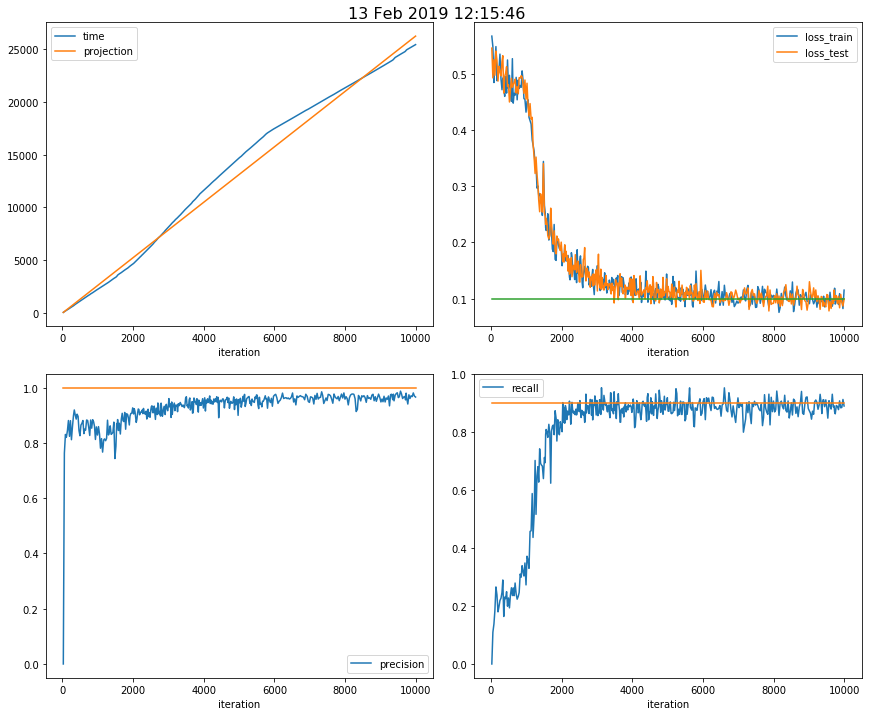

In [95]:
itime = 0
df_info = plot_info(data_info[itime], time.strftime(time_format, time_info[itime]))

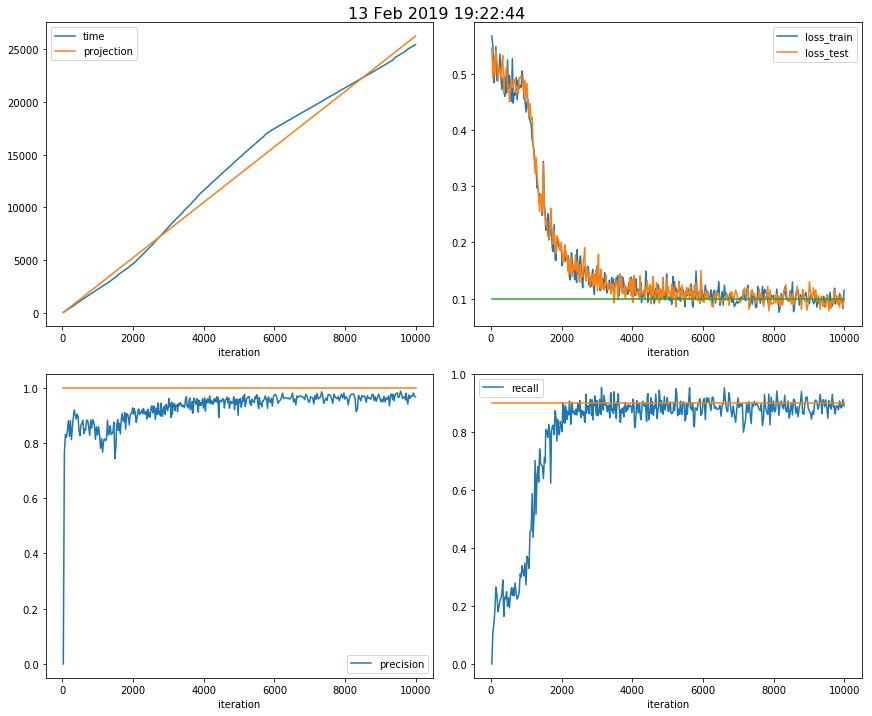

In [96]:
itime = 1
df_info = plot_info(data_info[itime], time.strftime(time_format, time_info[itime]))